In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code source
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

In [4]:
model1 = atlas.construct_model_from_interaction_network('../docs/networks/ProtProt_network3.tsv', verbose = False)
model2 = atlas.construct_model_from_metabolic_network('../docs/networks/metabolic_network3.tsv', verbose = False)

In [5]:
atlas.combine_models(model1, model2)

<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 22, parameters: 113, expressions: 0, compartments: 0) at 0x7fadedfbdc88>

In [6]:
# model initial condition
simulation.set_initial.met(model2, 'beta_lactose', 'per', 100)
simulation.set_initial.met(model2, 'PROTON', 'per', 100)
simulation.set_initial.met(model2, 'WATER', 'cyt', 100)

simulation.set_initial.prot(model2, 'lacZ', 'cyt', 4)
simulation.set_initial.prot(model2, 'lacA', 'cyt', 3)
simulation.set_initial.prot(model2, 'lacY', 'mem', 1)

<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 22, parameters: 113, expressions: 0, compartments: 0) at 0x7fadedfbdc88>

In [7]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
kasim = '/opt/git-repositories/KaSim4.Kappa-Dev/'
export.to_bngl(model2, 'test.bngl', bng)
export.to_kappa(model2, 'test.kappa')

In [8]:
data1 = simulation.ode(model2, start = 0, finish = 10, points = 200, path = bng)
data2 = simulation.ssa(model2, start = 0, finish = 10, points = 200, n_runs = 20, path = bng)
data3 = simulation.kasim(model2, start = 0, finish = 10, points = 200, n_runs = 20, path = kasim)

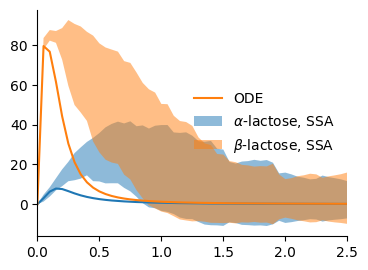

In [9]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot.metabolite(data3, 'alpha_lactose', 'cyt', **{'kind' : 'fill_between'}, plt_kws = {'label' : r'$\alpha$-lactose, SSA', 'alpha' : .5})
simulation.plot.metabolite(data3, 'beta_lactose', 'cyt', **{'kind' : 'fill_between'}, plt_kws = {'label' : r'$\beta$-lactose, SSA', 'alpha' : .5})
simulation.plot.metabolite(data1, 'alpha_lactose', 'cyt', plt_kws = {'label' : None})
simulation.plot.metabolite(data1, 'beta_lactose', 'cyt', plt_kws = {'label' : 'ODE'})

plt.xlim(0, 2.5)
seaborn.despine()

In [10]:
import pyvipr.pysb_viz as viz
viz.sp_view(model2, layout_name='cose-bilkent')

Viz(data=<Model 'atlas_rbm.construct_model_from_metabolic_network' (monomers: 2, rules: 22, parameters: 113, e…